# Create Video Synopsis

In [1]:
frames = {}
with open("./data/video-1-synopsis.csv", 'r') as f:
    first = True
    for line in f:
        if first:
            first = False
            continue
        print(line)
        f, id, x, y, w, h, nf = line.split(",")
        if int(nf) not in frames.keys():
            frames[int(nf)] = []
        frames[int(nf)].append([id, "./video-1-raw/" + id + "_" + f + ".jpg", int(x), int(y), int(w), int(h), int(f)])

3,1,588,553,43,37,1

4,1,589,553,42,37,2

5,1,588,553,42,38,3

6,1,585,554,44,39,4

7,1,584,554,44,40,5

8,1,584,553,45,42,6

9,1,584,554,44,41,7

10,1,582,553,47,44,8

11,1,581,552,49,46,9

12,1,581,553,49,45,10

13,1,582,554,46,44,11

14,1,583,554,45,45,12

15,1,581,554,46,45,13

16,1,580,553,48,47,14

17,1,581,554,47,47,15

18,1,580,554,48,47,16

19,1,576,556,51,46,17

20,1,578,555,49,48,18

21,1,577,557,49,47,19

22,1,578,557,47,48,20

23,1,579,557,45,50,21

24,1,577,557,47,50,22

25,1,575,558,49,50,23

26,1,574,558,50,52,24

27,1,569,559,54,53,25

28,1,567,560,54,54,26

29,1,564,560,57,56,27

30,1,562,561,59,57,28

31,1,561,561,60,58,29

32,1,560,562,61,59,30

33,1,561,563,59,60,31

34,1,559,562,61,64,32

35,1,559,563,60,66,33

36,1,557,563,61,68,34

37,1,549,564,69,70,35

38,1,545,564,74,73,36

39,1,543,567,74,75,37

40,1,540,567,79,78,38

41,1,535,569,82,81,39

42,1,532,569,85,84,40

43,1,528,570,87,86,41

44,1,527,572,88,88,42

44,2,735,761,339,304,1

45,1,518,573,95,92,43

45,

In [2]:
frames

{1: [['1', './video-1-raw/1_3.jpg', 588, 553, 43, 37, 3],
  ['2', './video-1-raw/2_44.jpg', 735, 761, 339, 304, 44]],
 2: [['1', './video-1-raw/1_4.jpg', 589, 553, 42, 37, 4],
  ['2', './video-1-raw/2_45.jpg', 723, 731, 278, 239, 45]],
 3: [['1', './video-1-raw/1_5.jpg', 588, 553, 42, 38, 5],
  ['2', './video-1-raw/2_46.jpg', 715, 709, 234, 208, 46]],
 4: [['1', './video-1-raw/1_6.jpg', 585, 554, 44, 39, 6]],
 5: [['1', './video-1-raw/1_7.jpg', 584, 554, 44, 40, 7],
  ['2', './video-1-raw/2_48.jpg', 704, 676, 174, 147, 48]],
 6: [['1', './video-1-raw/1_8.jpg', 584, 553, 45, 42, 8],
  ['2', './video-1-raw/2_49.jpg', 699, 665, 155, 136, 49],
  ['5', './video-1-raw/5_146.jpg', 587, 552, 44, 39, 146],
  ['6', './video-1-raw/6_193.jpg', 723, 728, 269, 234, 193]],
 7: [['1', './video-1-raw/1_9.jpg', 584, 554, 44, 41, 9],
  ['2', './video-1-raw/2_50.jpg', 695, 653, 139, 129, 50],
  ['5', './video-1-raw/5_147.jpg', 587, 552, 44, 39, 147],
  ['6', './video-1-raw/6_194.jpg', 714, 707, 233, 206, 

In [3]:
frames2 = frames.copy()

In [4]:
import cv2
import numpy as np

height = 1280
width = 1280
img = np.zeros((height,width,3), np.uint8)
cv2.imwrite('background.jpg', img)

True

In [5]:
import cv2

def create_video_synopsis():
    _frames = frames.copy()
    max_frame = max(list(frames.keys()))
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter('Demo-BBT.mp4',fourcc, 30, (1280,1280))
        
    for num_frame in range(max_frame + 1):
        frame = cv2.imread("background.jpg")

        if num_frame in _frames.keys():
            frames[num_frame].reverse()
            for tag, photo, x, y, w, h, id in _frames[num_frame]:
                s_img = cv2.imread(photo)
                frame[y:y+s_img.shape[0], x:x+s_img.shape[1]] = s_img
                cv2.rectangle(frame,(x,y),(x+w,y+h),thickness=2,color=(255,0,0))
                cv2.putText(frame,str(id/30),(x,y-20),cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,255,0), 2)
        
        try:
            out.write(frame)
        except:
            continue
    out.release()

In [6]:
 #create_video_synopsis()

In [7]:
def create_video_synopsis_2():
    
    max_frame = max(list(frames2.keys()))
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter('Demo-BBT-real.mp4',fourcc, 30, (1280,1080))
        
    for num_frame in range(max_frame + 1):
        frame = cv2.imread("real_background.jpg")

        if num_frame in frames.keys():
            frames2[num_frame].reverse()
            for photo, x, y, w, h, id in frames2[num_frame]:
                s_img = cv2.imread(photo)
                frame[y:y+s_img.shape[0], x:x+s_img.shape[1]] = s_img
                cv2.rectangle(frame,(x,y),(x+w,y+h),thickness=2,color=(255,0,0))
                cv2.putText(frame,str(id/30),(x,y-20),cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,255,0), 2)
        
        try:
            out.write(frame[:-200])
        except:
            continue
    out.release()

In [8]:
#create_video_synopsis_2()

In [9]:
import numpy as np

def complete_frames(frames):
    
    tags = np.unique([ frame[0][0] for frame in frames.values() ])
    max_frame = max(list(frames.keys()))
    
    interpolated_frames = { i:[] for i in range(1, max_frame+1) }
    
    for tag in tags:
        
        taglist = {}
        for frame, data in frames.items():
            for tagdata in data:
                if tagdata[0] == tag:
                    tagdatacp = tagdata.copy()
                    taglist[int(frame)] = tagdatacp
        
        
        frames_of_tag = list(taglist.keys())
        frames_of_tag.sort()
        
        for i in range(1, len(frames_of_tag)):
            prev_frame = frames_of_tag[i-1]
            curr_frame = frames_of_tag[i]
            if curr_frame == prev_frame + 1: continue
            
            xp = [ prev_frame, curr_frame ]
            x_axis_p = [ taglist[prev_frame][2], taglist[curr_frame][2] ]
            y_axis_p = [ taglist[prev_frame][3], taglist[curr_frame][3] ]
            
            for j in range(prev_frame + 1, curr_frame):
                x_pred = np.interp(j, xp, x_axis_p)
                y_pred = np.interp(j, xp, y_axis_p)
                
                taglist[i] = taglist[prev_frame].copy()
                taglist[i][2] = x_pred
                taglist[i][3] = y_pred
            
        for frame, arr in taglist.items():
            interpolated_frames[frame].append(arr)
    
    return interpolated_frames

intfr = complete_frames(frames)


In [10]:
def generate_synopsis(frames, output='Demo-BBT-real-interp.mp4', fps=30, bgpath="real_background.jpg"):
    _frames = frames.copy()
    
    max_frame = max(list(_frames.keys()))
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter(output, fourcc, fps, (1280,1080))
        
    _frames = complete_frames(_frames)
        
    for num_frame in range(max_frame + 1):
        frame = cv2.imread(bgpath)

        if num_frame in _frames.keys():
            _frames[num_frame].reverse()
            for tag, photo, x, y, w, h, fr in _frames[num_frame]:
                s_img = cv2.imread(photo)
                y = int(y)
                x = int(x)
                frame[y:y+s_img.shape[0], x:x+s_img.shape[1]] = s_img
                cv2.rectangle(frame,(x,y),(x+w,y+h),thickness=2,color=(255,0,0))
                cv2.putText(frame,str(fr/30),(x,y-20),cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,255,0), 2)
        
        try:
            out.write(frame[:-200])
        except:
            continue
    out.release()

In [11]:
#generate_synopsis(frames)

# Small changes

In [12]:
import cv2
import numpy as np

from collections import OrderedDict

In [13]:
frames = {}
with open("./data/video-1-synopsis.csv", 'r') as f:
    first = True
    for line in f:
        if first:
            first = False
            continue
        f, tag, x, y, w, h, nf = line.split(",")
        if int(nf) not in frames.keys():
            frames[int(nf)] = []
            
        frames[int(nf)].append({
            'tag': int(tag), 
            'file': f'./video-1-raw/{tag}_{f}.jpg', 
            'x': int(x), 
            'y': int(y), 
            'w': int(w), 
            'h': int(h), 
            'frame': int(f)
        })

In [14]:
l=list(frames.keys())
l.sort()

Interpolate the missing frames

In [15]:
from scipy.interpolate import UnivariateSpline

def unique_tags(frames):
    tags = set()
    for frame_content in frames.values():
        for object_data in frame_content:
            tags.add(object_data.get('tag'))
    return tags
    

def extract_frames_by_tag(frames, tag):
    keys = list(frames.keys())
    keys.sort()
    tagframes = {}
    for new_frame in keys:
        for data in frames[new_frame]:
            if tag == data.get('tag'):
                tagframes[new_frame] = data.copy()
                break
    return tagframes
    

def params_to_interpolate_by_tag(tagframes):
    x, y, f = [], [], []
    ord_tagframes = OrderedDict(sorted(tagframes.items()))
    for frame, content in tagframes.items():
        x.append(content.get('x'))
        y.append(content.get('y'))
        f.append(content.get('frame'))
    return x, y, f
        
    
def complete_frames(frames):
    """
    """
    tags = unique_tags(frames)
    last_frame = max(list(frames.keys()))
    interpolated_frames = { i:[] for i in range(1, last_frame + 1) }
    for tag in tags:
        tagframes = extract_frames_by_tag(frames, tag)
        frames_of_tag = list(tagframes.keys())
        frames_of_tag.sort()
        X, Y, F = params_to_interpolate_by_tag(tagframes)
        for i in range(1, len(frames_of_tag)):
            prev_frame = frames_of_tag[i-1]
            curr_frame = frames_of_tag[i]
            xp  = [ prev_frame, curr_frame ]
            ypX = [ tagframes[prev_frame]['x'], tagframes[curr_frame]['x'] ]
            ypY = [ tagframes[prev_frame]['y'], tagframes[curr_frame]['y'] ]
            if curr_frame == prev_frame + 1: continue
            for j in range(prev_frame + 1, curr_frame):     
                x_pred = np.interp(j, xp, ypX)
                y_pred = np.interp(j, xp, ypY)
                tagframes[j] = tagframes[prev_frame].copy()
                tagframes[j]['x'] = x_pred
                tagframes[j]['y'] = y_pred
        for frame in range(1, last_frame):
            if frame not in tagframes:
                continue
            interpolated_frames[frame].append(tagframes[frame])
    return interpolated_frames

Testing interpolation

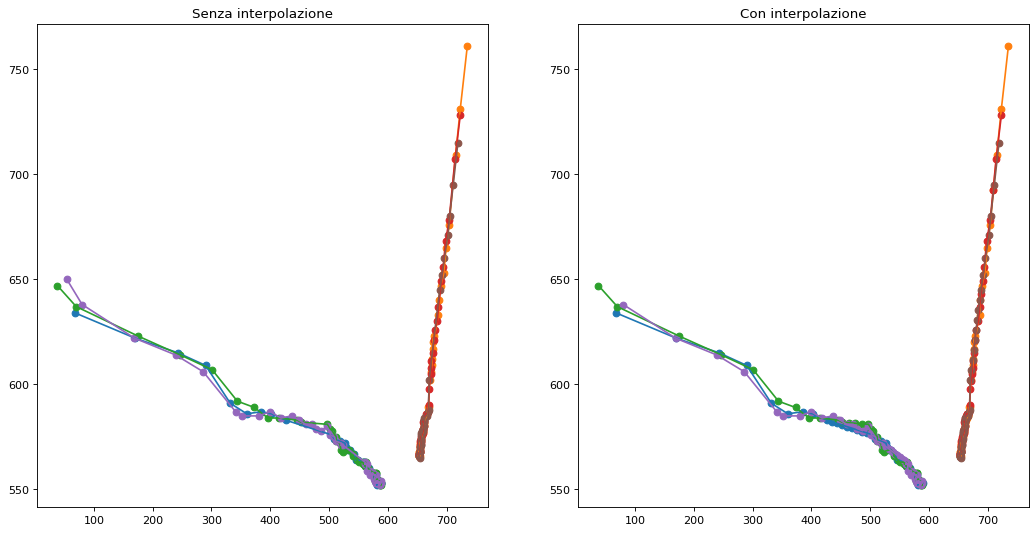

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8), dpi=80)

plt.subplot(1, 2, 1) # row 1, col 2 index 1

tubes = [1, 2, 5, 6, 9, 10]

for tag in tubes:
    oggetto = extract_frames_by_tag(frames, tag)
    x = np.array([ frame.get('x') for idx, frame in oggetto.items() ])
    y = np.array([ frame.get('y') for idx, frame in oggetto.items() ])            
    plt.gca().invert_yaxis()
    plt.scatter(x, y)
    plt.plot(x,y)
    
plt.title("Senza interpolazione")

plt.subplot(1, 2, 2) # index 2

interp_frames = complete_frames(frames)
for tag in tubes:
    oggetto = extract_frames_by_tag(interp_frames, tag)
    x = np.array([ frame.get('x') for idx, frame in oggetto.items() ])
    y = np.array([ frame.get('y') for idx, frame in oggetto.items() ])
    plt.gca().invert_yaxis()
    plt.scatter(x, y)
    plt.plot(x,y)

plt.title("Con interpolazione")    
plt.show()


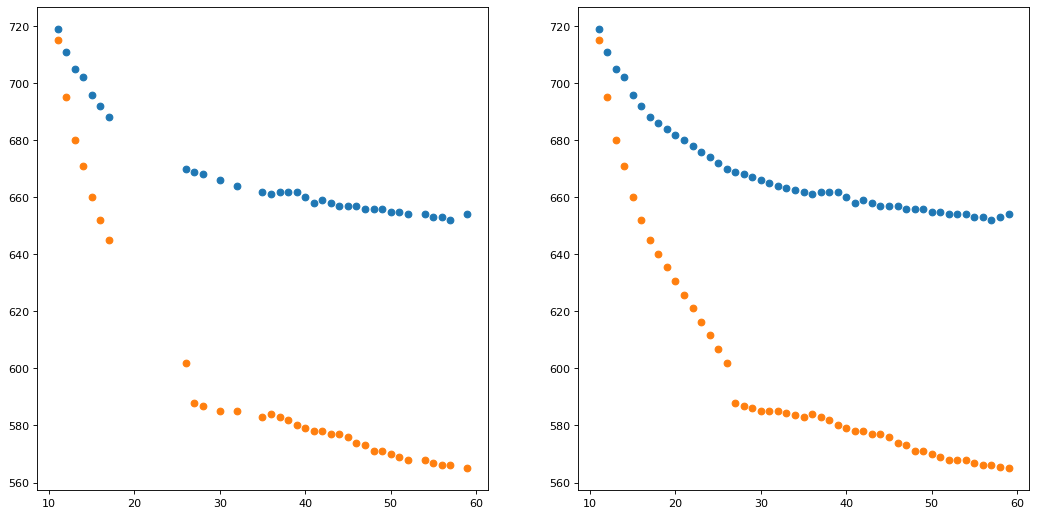

In [17]:
plt.figure(figsize=(16, 8), dpi=80)

TAG = 10

#---------- No interpolazione

plt.subplot(1, 2, 1) # row 1, col 2 index 1
frames_no_interp = extract_frames_by_tag(frames, TAG)
x = list(frames_no_interp.keys())
yx = [ frame.get('x') for frame in frames_no_interp.values() ]
yy = [ frame.get('y') for frame in frames_no_interp.values() ]
plt.scatter(x,yx)
plt.scatter(x,yy)

#---------- Interpolazione

plt.subplot(1, 2, 2) # row 1, col 2 index 1
interp_frames = complete_frames(frames)
frames_no_interp = extract_frames_by_tag(interp_frames, TAG)
x = list(frames_no_interp.keys())
yx = [ frame.get('x') for frame in frames_no_interp.values() ]
yy = [ frame.get('y') for frame in frames_no_interp.values() ]
plt.scatter(x,yx)
plt.scatter(x,yy)

plt.show()

In [19]:
def generate_synopsis(frames, output, fps, bgpath, interp=False):
    """
    """
    _frames = frames.copy()
    max_frame = max(list(_frames.keys()))
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter(output, fourcc, fps, (1280,1080))
    if interp:
        _frames = complete_frames(_frames)    
    for num_frame in range(1, max_frame + 1):
        frame = cv2.imread(bgpath)
        if num_frame in _frames.keys():           
            objects = sorted(_frames[num_frame], key=lambda d: d['tag'], reverse=True) 
            for obj in objects:
                fr = obj.get('frame')
                s_img = cv2.imread(obj.get('file'))
                x = int(obj.get('x'))
                y = int(obj.get('y'))
                w = int(obj.get('w'))
                h = int(obj.get('h'))
                frame[y:y+s_img.shape[0], x:x+s_img.shape[1]] = s_img
                cv2.rectangle(frame,(x,y),(x+w,y+h),thickness=2,color=(255,0,0))
                cv2.putText(frame,str(fr/30),(x,y-20),cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,255,0), 2)
        try:
            out.write(frame[:-200])
        except:
            continue
    out.release()

In [20]:
fps = 30
output = 'Demo-BBT-real.mp4'
output_int = 'Demo-BBT-real-interp.mp4'
bgpath = 'real_background.jpg'

generate_synopsis(frames, output_int, fps, bgpath, True)